In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:/Users/DATA Analysis p1.2/historical_data.csv")

UNDERSTANDING THE DATA

In [4]:
data.head()# it will print first 5 rows of dataset

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [5]:
data.tail()

,Date,AMZN,DPZ,BTC,NFLX
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010
1519,5/14/2019,1840.119995,272.859985,8183.830078,345.609985


In [6]:
data.shape

(1520, 5)

In [7]:
data.columns

Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')

In [8]:
data.dtypes

Date     object
AMZN    float64
DPZ     float64
BTC     float64
NFLX    float64
dtype: object

In [9]:
data.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


In [10]:
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
data.set_index('Date', inplace=True)


FINDING MISSING VALUES

In [12]:
print(data.isnull().sum())

AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64


In [13]:
data.sort_index(inplace=True)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1520 entries, 2013-05-01 to 2019-05-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1520 non-null   float64
 1   DPZ     1520 non-null   float64
 2   BTC     1520 non-null   float64
 3   NFLX    1520 non-null   float64
dtypes: float64(4)
memory usage: 59.4 KB


EXPLORATORY DATA ANALYSIS

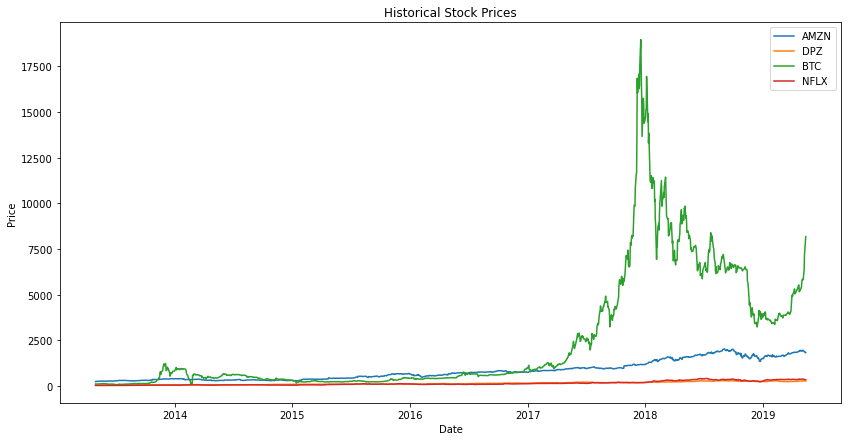

In [15]:
plt.figure(figsize=(14, 7))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [16]:
data['AMZN_MA30'] = data['AMZN'].rolling(window=30).mean()


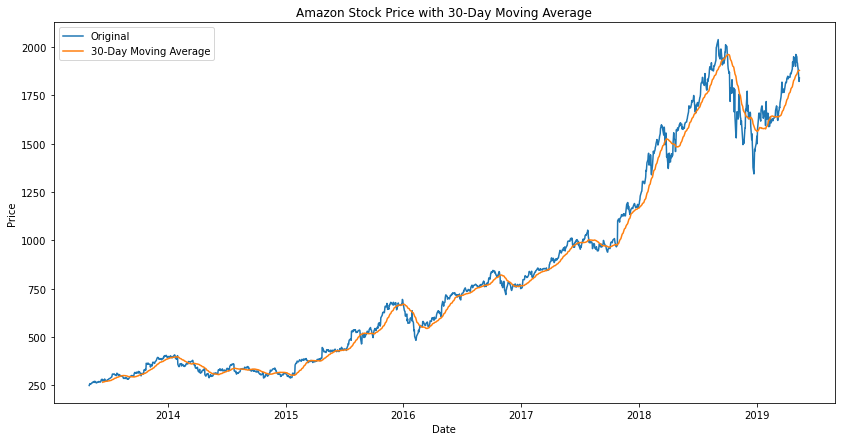

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['AMZN'], label='Original')
plt.plot(data.index, data['AMZN_MA30'], label='30-Day Moving Average')
plt.title('Amazon Stock Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

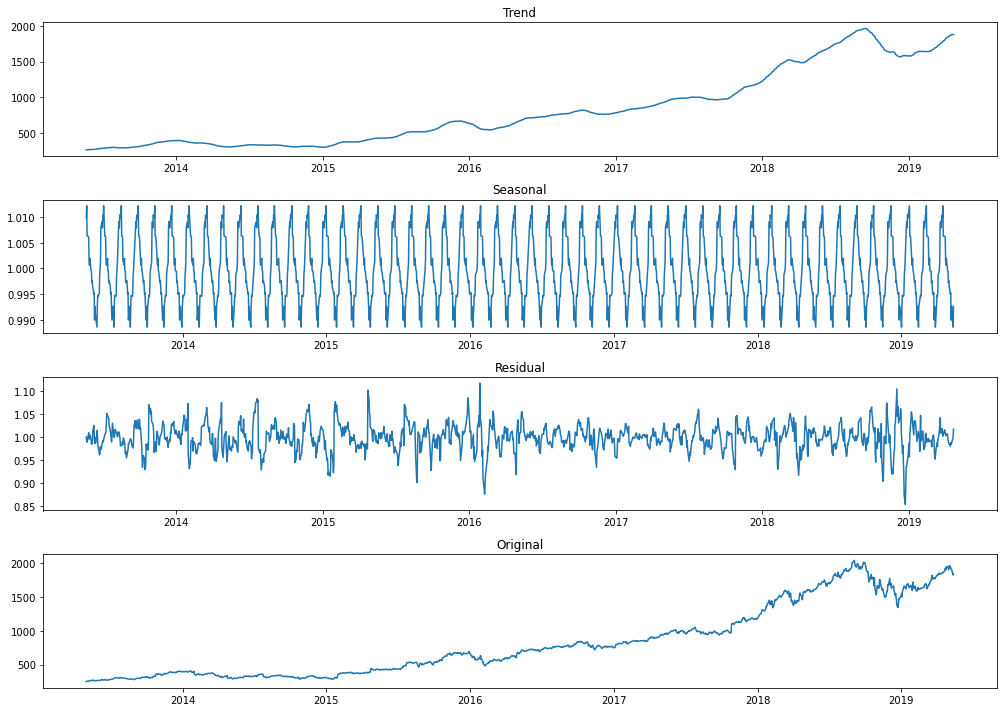

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['AMZN'], model='multiplicative', period=30)

# Plot decomposition
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.subplot(4, 1, 4)
plt.plot(data['AMZN'], label='Original')
plt.title('Original')
plt.tight_layout()
plt.show()

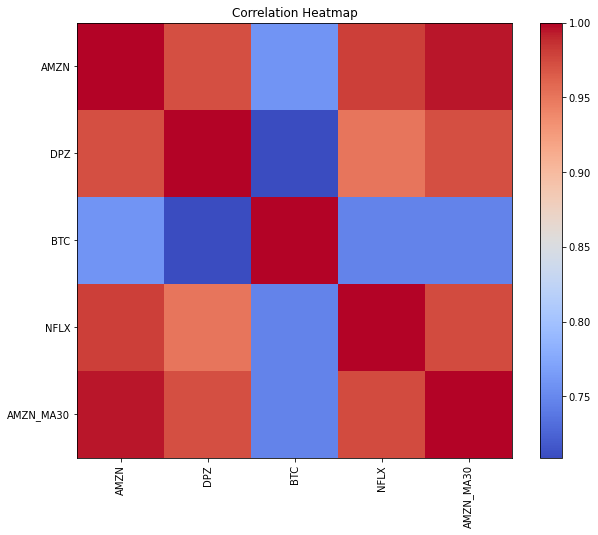

In [19]:
correlation_matrix = data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

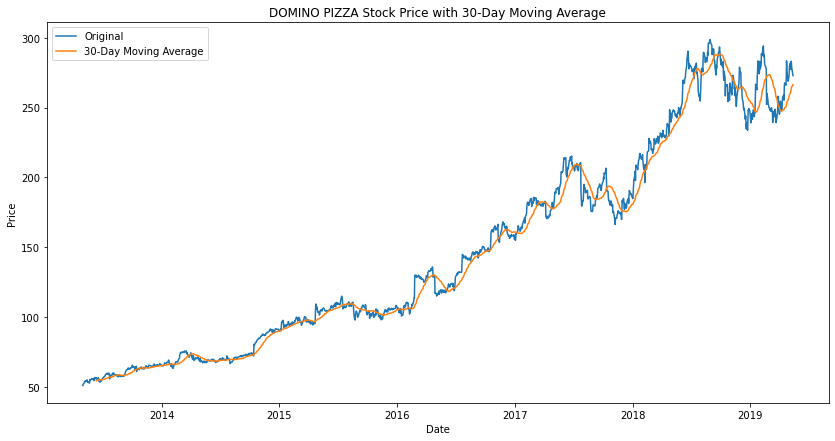

In [20]:
data['DPZ_MA30'] = data['DPZ'].rolling(window=30).mean()
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['DPZ'], label='Original')
plt.plot(data.index, data['DPZ_MA30'], label='30-Day Moving Average')
plt.title('DOMINO PIZZA Stock Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

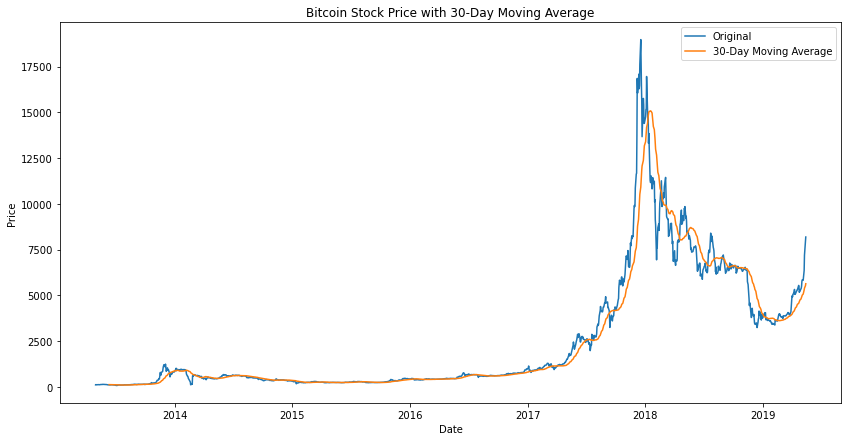

In [21]:
data['BTC_MA30'] = data['BTC'].rolling(window=30).mean()
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['BTC'], label='Original')
plt.plot(data.index, data['BTC_MA30'], label='30-Day Moving Average')
plt.title('Bitcoin Stock Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

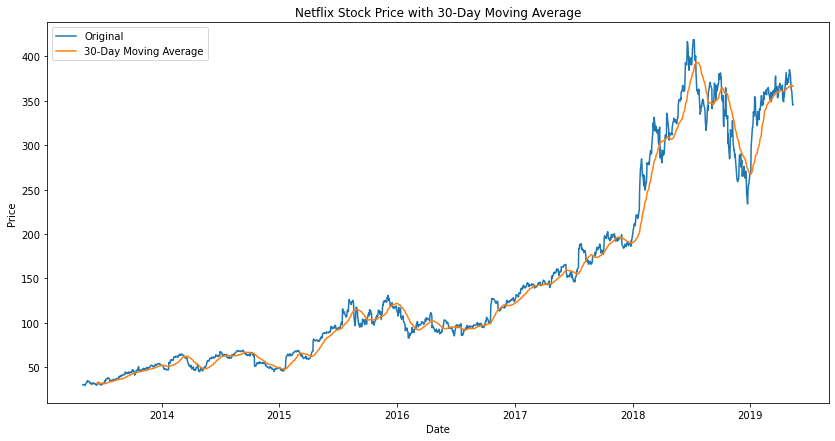

In [22]:
data['NFLX_MA30'] = data['NFLX'].rolling(window=30).mean()
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['NFLX'], label='Original')
plt.plot(data.index, data['NFLX_MA30'], label='30-Day Moving Average')
plt.title('Netflix Stock Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Here plot all at once to observe the stock price difference

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

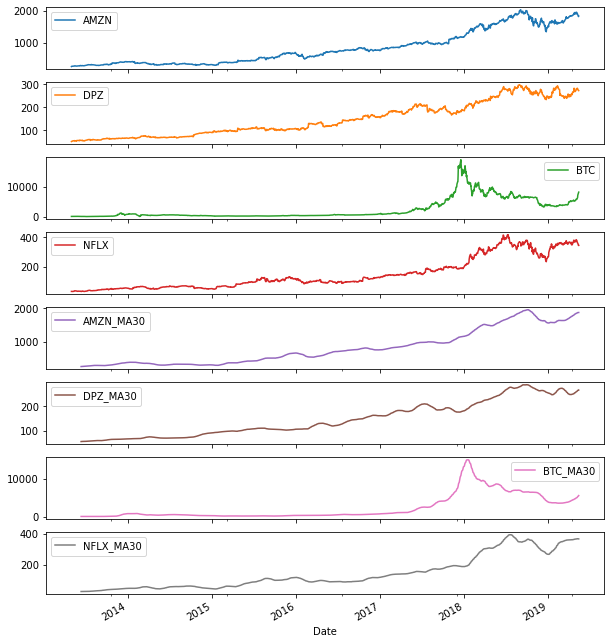

In [23]:
data.plot(subplots=True, figsize=(10, 12))

<AxesSubplot:>

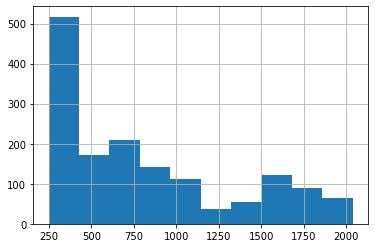

In [24]:
data['AMZN'].hist()

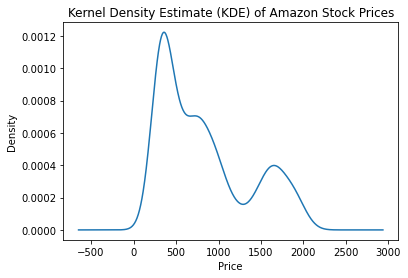

In [25]:
data['AMZN'].plot(kind='kde')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) of Amazon Stock Prices')
plt.show()

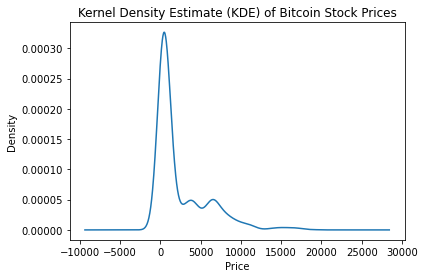

In [26]:
data['BTC'].plot(kind='kde')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) of Bitcoin Stock Prices')
plt.show()

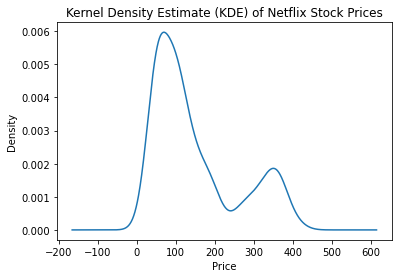

In [27]:
data['NFLX'].plot(kind='kde')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) of Netflix Stock Prices')
plt.show()

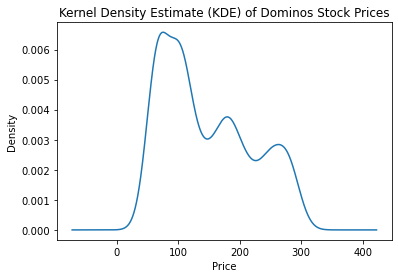

In [28]:
data['DPZ'].plot(kind='kde')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) of Dominos Stock Prices')
plt.show()

In [29]:
print("END!")

END!
